In [1]:
from os.path import join

from random import sample, seed

import h5py

from pandas import read_csv, DataFrame

In [2]:
data_dir = "/home/benoit/data/dreem_challenge/"
data_path = "/home/benoit/data/dreem_challenge/X_train/X_train.h5"
labels_path = "/home/benoit/data/dreem_challenge/y_train.csv"

d = h5py.File(data_path, 'r')
labels = read_csv(labels_path)

print(d.keys())

<KeysViewHDF5 ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6', 'eeg_7', 'index', 'index_absolute', 'index_window', 'pulse', 'x', 'y', 'z']>


In [3]:
meta_data = DataFrame()

meta_data['index'] = d['index_absolute'][()]
meta_data['subject_id'] = d['index'][()]
meta_data['window'] = d['index_window'][()]
meta_data['label'] = labels['sleep_stage']

_N_ = len(meta_data)
_F_ = 50

In [4]:
from tools.plot import plot_eeg

index = 300  

# plot_eeg(index, d, meta_data)

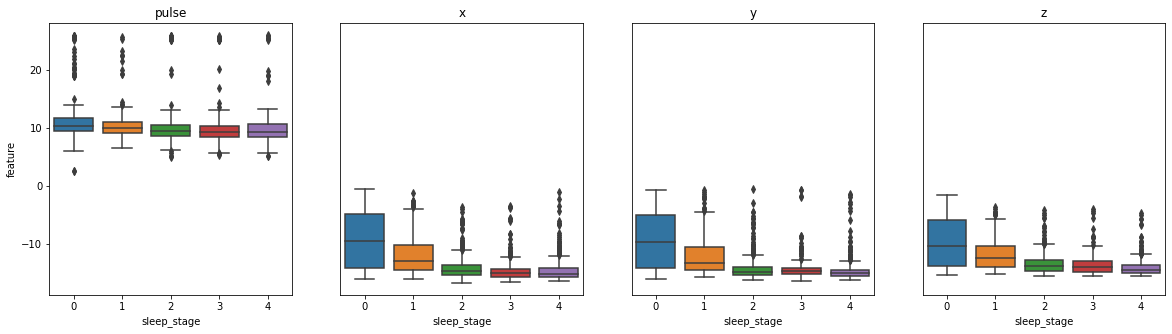

In [8]:
# Etudes des features

from tools.plot import compare_feature
from tools.features import *


spl = sample([i for i in range(_N_)], 2000)

compare_feature(log_variance, d, meta_data, sample=spl, col=['pulse', 'x', 'y', 'z'])

In [ ]:
from tools.features_class import *
from tools.processing import extract_all_features, extract_features

func_class = [Log_ampl, Log_variance]
#columns = ["eeg_1","eeg_2","eeg_3","eeg_4","eeg_5","eeg_6","eeg_7"]
columns =['pulse', 'x', 'y', 'z']

extract_all_features(func_class, data=d, save=join(data_dir, "computed", "base_3_train.csv"), col=columns)


In [ ]:
eval_path = "/home/benoit/data/dreem_challenge/X_test/X_test.h5"

d_eval = h5py.File(eval_path, 'r')

extract_all_features(features, data=d_eval, save=join(data_dir, "computed", "base_X_eval.csv"), col=columns)